# Environment set-up

In [86]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [87]:
import pathlib
path = pathlib.Path('/content/gdrive/MyDrive/Fyp')
try:
    path.mkdir()
    %cd '/content/gdrive/MyDrive/Fyp'
    ! git clone https://github.com/TanShengRong/FYP-RPI-RF-Sensing
    %cd './FYP-RPI-RF-Sensing/dataset/'
    print('Project folder created in your GoogleDrive')
except FileExistsError:
    %cd '/content/gdrive/MyDrive/Fyp/FYP-RPI-RF-Sensing/'
    ! git pull
    %cd './dataset_v2/'

/content/gdrive/MyDrive/Fyp/FYP-RPI-RF-Sensing
Already up to date.
/content/gdrive/MyDrive/Fyp/FYP-RPI-RF-Sensing/dataset_v2


In [88]:
pwd

'/content/gdrive/My Drive/Fyp/FYP-RPI-RF-Sensing/dataset_v2'

In [89]:
ls

gestureA/  gestureC/  gestureE/


# Preliminary findings

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

(472, 282)


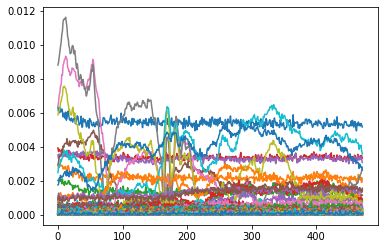

'\n>> ii = ans(:, 1:138);\n>> qq = ans(:, 139:end-1);\n>> iq = ii+j*qq;\n>> imagesc(abs(iq))\n>> plot(abs(iq(1,:)))\n'

In [91]:
df = pd.read_csv("./gestureA/degree0/1.csv") # shape = duration(millisecond?) x readings
shape = df.shape # (row,col)
print(shape)
tmp = [ _ for _ in range(shape[1]//2)]
ii = df.iloc[:, 0:shape[1]//2]
ii.columns = tmp
qq = df.iloc[:, shape[1]//2:shape[1] ]
qq.columns = tmp
iq = ii.add(qq, fill_value=None) # fill_value defaults as None
iq = abs(iq)
# iq.plot(kind="hexbin", x=)
iq.plot(legend=None)
plt.show()
"""
>> ii = ans(:, 1:138);
>> qq = ans(:, 139:end-1);
>> iq = ii+j*qq;
>> imagesc(abs(iq))
>> plot(abs(iq(1,:)))
"""

Doesn't seem to make much sense...

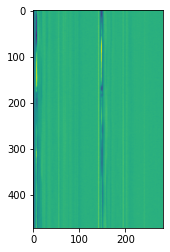

In [92]:
df = pd.read_csv("./gestureA/degree0/1.csv") # shape = duration(millisecond?) x readings
plt.imshow(df)

real part:           0         1         2    ...       138       139       140
0   -0.007352 -0.003635 -0.002763  ...  0.000003  0.000002 -0.000061
1   -0.007331 -0.003597 -0.002761  ...  0.000013 -0.000005 -0.000011
2   -0.007310 -0.003570 -0.002794  ... -0.000057 -0.000021  0.000068
3   -0.007497 -0.003677 -0.002754  ...  0.000066  0.000020  0.000067
4   -0.007325 -0.003595 -0.002692  ...  0.000021  0.000006  0.000046
..        ...       ...       ...  ...       ...       ...       ...
467 -0.007264 -0.003526 -0.002664  ...  0.000100 -0.000009 -0.000023
468 -0.007206 -0.003437 -0.002610  ... -0.000111 -0.000123 -0.000019
469 -0.007243 -0.003388 -0.002465  ... -0.000059 -0.000064  0.000014
470 -0.007088 -0.003193 -0.002497  ... -0.000104 -0.000024  0.000023
471 -0.007137 -0.003407 -0.002571  ... -0.000051 -0.000044 -0.000021

[472 rows x 141 columns]


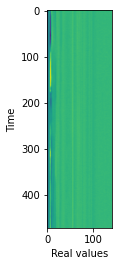

In [93]:
# real = df.iloc[:, 0:138]
real = df.iloc[:, 0:141]
cols = [ _ for _ in range(141)]
real.columns = cols
print('real part: {}'.format(real))
plt.xlabel("Real values")
plt.ylabel("Time")
# plt.gca().invert_yaxis()
plt.imshow(real)

imag part:           0         1         2    ...       138       139       140
0    0.001026  0.000725  0.000733  ...  0.000041  0.000102  0.000053
1    0.001311  0.000823  0.000781  ... -0.000083 -0.000119 -0.000045
2    0.001313  0.000784  0.000755  ... -0.000181 -0.000179 -0.000099
3    0.001176  0.000654  0.000755  ...  0.000048  0.000058 -0.000010
4    0.001286  0.000710  0.000726  ... -0.000033 -0.000146 -0.000101
..        ...       ...       ...  ...       ...       ...       ...
467  0.001921  0.001384  0.001317  ... -0.000055 -0.000100 -0.000114
468  0.001982  0.001378  0.001241  ... -0.000045 -0.000038 -0.000014
469  0.001869  0.001194  0.001133  ...  0.000019 -0.000020  0.000027
470  0.001798  0.001283  0.001179  ... -0.000115 -0.000119 -0.000071
471  0.001973  0.001260  0.001143  ... -0.000044 -0.000070 -0.000112

[472 rows x 141 columns]


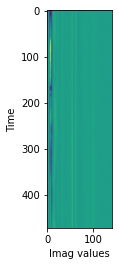

In [94]:
# imag = df.iloc[:, 138:277-1 ]
imag = df.iloc[:, 141:282 ]
cols = [ _ for _ in range(141)]
imag.columns = cols
print('imag part: {}'.format(imag))
plt.xlabel("Imag values")
plt.ylabel("Time")
plt.imshow(imag)

In [95]:
df = pd.DataFrame({'wspd':[10.23,2.4,30.6], 'wdir':[2.3,7.8,4]})
df['com'] = df['wspd'] + df['wdir'] * 1j
print (df)

    wspd  wdir                  com
0  10.23   2.3  10.230000+2.300000j
1   2.40   7.8   2.400000+7.800000j
2  30.60   4.0  30.600000+4.000000j


In [96]:
real.iloc[0]

0     -0.007352
1     -0.003635
2     -0.002763
3     -0.003194
4     -0.002044
         ...   
136   -0.000046
137   -0.000004
138    0.000003
139    0.000002
140   -0.000061
Name: 0, Length: 141, dtype: float64

# Deep Learning

In [97]:
ls

gestureA/  gestureC/  gestureE/


In [98]:
pwd

'/content/gdrive/My Drive/Fyp/FYP-RPI-RF-Sensing/dataset_v2'

## Dataloading

In [143]:
#=== Params ===#
DATASET_DIR = '/content/gdrive/MyDrive/Fyp/FYP-RPI-RF-Sensing/dataset_v2/'
GESTURE_DEGREE = "degree0"
DATA_ROW_LOWER_LIMIT = 200
DATA_ROW_UPPER_LIMIT = 400 #540 # 12s -> 600 (3 transitions)
BATCH_SIZE = 30
NUM_WORKERS = 0 # 2; 0 is default
SHUFFLE = True
# cols = [i for i in range(138)]
cols = [i for i in range(141)]
VALIDATION_SPLIT = .2
RANDOM_SEED = 42

In [144]:
#=== Dataloading ===#
import os
from torch.utils.data import Dataset
import numpy as np
from torch.utils.data import DataLoader


class GestureDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.root_dir = root_dir
        # self.root_dir = '/content/gdrive/MyDrive/Fyp/FYP-RPI-RF-Sensing/dataset/'
        self.gesture_list = self.getGestureList()
        self.gesturePerFolder = 100 # change this if increasing no. of sample per gesture per degree
        self.gestureDegree = GESTURE_DEGREE
        self.transform = transform
    
    def __len__(self):
        return len(self.gesture_list) * self.gesturePerFolder
        
    def __getitem__(self, idx):
        item_gesture_type_idx = idx // self.gesturePerFolder
        item_gesture_type = self.gesture_list[item_gesture_type_idx],
        item_idx = idx % self.gesturePerFolder
        # print(item_gesture_type_idx, item_gesture_type[0], item_idx)
        item_gesture_path = os.path.join(
            self.root_dir,   
            item_gesture_type[0],
            self.gestureDegree,
            str(item_idx+1) + ".csv"
            )
        item_gesture_df = pd.read_csv(item_gesture_path, header=0) 
        # real = item_gesture_df.iloc[ DATA_ROW_LOWER_LIMIT:DATA_ROW_UPPER_LIMIT, :138 ]
        real = item_gesture_df.iloc[ DATA_ROW_LOWER_LIMIT:DATA_ROW_UPPER_LIMIT, :141 ]
        real.columns = cols
        # imag = item_gesture_df.iloc[ DATA_ROW_LOWER_LIMIT:DATA_ROW_UPPER_LIMIT, 138:277-1 ] * 1j
        imag = item_gesture_df.iloc[ DATA_ROW_LOWER_LIMIT:DATA_ROW_UPPER_LIMIT, 141:282 ] * 1j
        imag.columns = cols
        comp = abs(real.add(imag, fill_value=(0)))
        
        features = comp.values
        features = torch.FloatTensor(features)
        features = features.view(1, DATA_ROW_UPPER_LIMIT-DATA_ROW_LOWER_LIMIT, item_gesture_df.shape[1]//2)
        targets = np.zeros(len(self.gesture_list))
        targets[item_gesture_type_idx] = 1
        targets = torch.FloatTensor(targets)
        sample = {'features': features, 'targets': targets}
        # if self.transform:
        #     sample = self.transform(sample)
        return sample
        
    def getGestureList(self):
        gestureList = []
        for _, dirnames, filenames in os.walk(self.root_dir):
            if any("gesture" in dirname for dirname in dirnames):
                gestureList += dirnames
        print(gestureList)
        return gestureList

In [145]:
from torch.utils.data.sampler import SubsetRandomSampler


dataset = GestureDataset(DATASET_DIR)
dataset_size = len(dataset)
indices = list(range(dataset_size))
split = int(np.floor(VALIDATION_SPLIT * dataset_size))

if SHUFFLE :
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = DataLoader(dataset, batch_size=BATCH_SIZE, 
                                           sampler=train_sampler)
validation_loader = DataLoader(dataset, batch_size=BATCH_SIZE,
                                                sampler=valid_sampler)

['gestureA', 'gestureC', 'gestureE']


In [146]:
#=== printing some data from a dataset ===#
import torch 

for i in range(len(train_data)):
    sample = train_data[i]

    print(i)
    print(sample)
    print(sample['features'].shape)
    print(sample['targets'].shape)

    if i == 40:
        break

NameError: ignored

In [147]:
# dataloader = DataLoader(train_data,
#                             batch_size=BATCH_SIZE, 
#                             shuffle=SHUFFLE,
#                             num_workers=NUM_WORKERS)

In [148]:
#=== printing some data from a batch ===#
for i_batch, sample_batched in enumerate(train_loader):
    # print(i_batch, sample_batched['image'].size(),
    #       sample_batched['landmarks'].size())
    
    # observe 4th batch and stop.
    if i_batch == 3:
        print()
        print(sample_batched['features'])
        print(sample_batched['targets'])
        break
for i_batch, sample_batched in enumerate(validation_loader):
    # print(i_batch, sample_batched['image'].size(),
    #       sample_batched['landmarks'].size())
    
    # observe 4th batch and stop.
    if i_batch == 3:
        print()
        print(sample_batched['features'])
        print(sample_batched['targets'])
        break


tensor([[[[7.0322e-03, 3.3613e-03, 2.6325e-03,  ..., 8.4309e-05,
           2.2136e-05, 6.2177e-05],
          [7.2489e-03, 3.4635e-03, 2.7140e-03,  ..., 6.4008e-05,
           4.1012e-05, 5.9034e-05],
          [7.0772e-03, 3.3023e-03, 2.5592e-03,  ..., 8.5959e-05,
           8.6833e-05, 5.2393e-05],
          ...,
          [7.1340e-03, 3.3462e-03, 2.5159e-03,  ..., 1.2074e-04,
           1.0966e-04, 3.7121e-05],
          [7.0974e-03, 3.3409e-03, 2.6016e-03,  ..., 1.5117e-04,
           1.7407e-04, 1.1513e-04],
          [7.0010e-03, 3.3413e-03, 2.6588e-03,  ..., 1.6808e-04,
           6.0828e-05, 1.1718e-04]]],


        [[[5.8403e-03, 1.8679e-03, 1.8836e-03,  ..., 1.5295e-04,
           7.2111e-05, 4.5695e-05],
          [5.8952e-03, 1.7670e-03, 1.8067e-03,  ..., 8.0660e-05,
           1.1769e-04, 9.7082e-05],
          [5.9433e-03, 1.9228e-03, 1.7709e-03,  ..., 6.6910e-05,
           8.0156e-05, 5.8669e-05],
          ...,
          [5.7339e-03, 1.8668e-03, 1.8812e-03,  ..., 9.8

In [135]:
# https://ieeexplore.ieee.org.remotexs.ntu.edu.sg/document/8249172


## 2D CNN - FCNN

In [168]:
#== MODEL ==#
import torch.nn as nn
import torch.nn.functional as F


class Net2(nn.Module):

    def __init__(self):
        super(Net2, self).__init__()
        '''
        conv2D, input should be in (N, C, H, W) format. 
        N is the number of samples/batch_size. C is the channels. H and W are height and width resp.
        '''
        self.conv1 = nn.Conv2d(1, 8, 2, 5, padding=1)
        self.conv2 = nn.Conv2d(8, 17, 2, 5, padding=1)

        self.fc1 = nn.Linear(34, 3)

    def forward(self, x):
        # print('before norm', x.shape)
# # inp is shape (N, C, H, W)
# n_chans = inp.shape[1]
# running_mu = torch.zeros(n_chans) # zeros are fine for first training iter
# running_std = torch.ones(n_chans) # ones are fine for first training iter
# x = nn.functional.batch_norm(inp, running_mu, running_std, training=True, momentum=0.9)
# # running_mu and running_std now have new values
        n_chans = x.shape[1]
        running_mu = torch.zeros(n_chans) # zeros are fine for first training iter
        running_std = torch.ones(n_chans) # ones are fine for first training iter
        x = F.batch_norm(x, running_mu, running_std, training=True, momentum=0.9)
        # print('after norm', x.shape)
        # print(x)

        x = self.conv1(x)
        # print('conv1', x.shape)

        # x = F.relu(x)
        x = F.tanh(x)
        
        x = F.max_pool2d(x, 2)
        # print('maxpool', x.shape)
        x = self.conv2(x)
        # print('conv2', x.shape)
        
        # x = F.relu(x)
        x = F.tanh(x)

        x = F.max_pool2d(x, 2)
        # print('maxpool', x.shape)

        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        # print('fc1', x)

        # x = F.softmax(x, dim=1)
        x = F.tanh(x)

        return x

net2 = Net2()
print(net2)

Net2(
  (conv1): Conv2d(1, 8, kernel_size=(2, 2), stride=(5, 5), padding=(1, 1))
  (conv2): Conv2d(8, 17, kernel_size=(2, 2), stride=(5, 5), padding=(1, 1))
  (fc1): Linear(in_features=34, out_features=3, bias=True)
)


In [169]:
for i_batch, sample_batched in enumerate(train_loader):
    if i_batch == 1:
        print(sample_batched)
        print(sample_batched['features'].shape)

        output = net2(sample_batched['features'])
        print('out', output.shape)
        print(output)

        target = sample_batched['targets']
        # target = target.view(1, -1)  # make it the same shape as output
        criterion = nn.MSELoss()

        loss = criterion(output, target)
        print('loss', loss)
        print(loss.grad_fn)  # MSELoss
        print(loss.grad_fn.next_functions[0][0])  # Linear
        print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

        break
#=== The learnable parameters of a model are returned by net.parameters() ===#
params = list(net2.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

KeyboardInterrupt: ignored

In [ ]:
import torch.optim as optim

criterion = nn.MSELoss()
# criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net2.parameters(), lr=0.001, momentum=0.5)

for epoch in range(5):
    # running_loss = 0.0
    epoch_loss = 0.0
    epoch_count = 0 
    correct = 0
    total = 0
    for i, data in enumerate(train_loader):
        inputs = data['features']
        labels = data['targets']
        # print(labels)

        optimizer.zero_grad() # zero the gradient buffers

        # forward + backward + optimize
        outputs = net2(inputs)
        # print(outputs.shape)
        # print(labels.shape)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step() # Does the update

        # print statistics
        # running_loss += loss.item()
        # if i % 20 == 19:    # print every 20 mini-batches
        #     print('[%d, %5d] loss: %.3f' %
        #           (epoch + 1, i + 1, running_loss / 20))
        #     running_loss = 0.0

    for i, data in enumerate(validation_loader):
        inputs = data['features']
        labels = data['targets']
        
        optimizer.zero_grad() # zero the gradient buffers

        # forward + backward + optimize
        outputs = net2(inputs)
        # print(outputs.shape)
        # print(labels.shape)
        loss = criterion(outputs, labels)

        epoch_loss += loss.item()
        _, label = torch.max(labels, 1)
        _, predicted = torch.max(outputs, 1)
        comparison_tensor = torch.eq(label, predicted).long()
        correct += torch.count_nonzero(comparison_tensor)
        total += comparison_tensor.shape[0]
    print('epoch: {} Loss: {:.3f} Accu: {:.5f}'.format(epoch+1, epoch_loss, correct.item()/total))
print('Finished Training')

In [ ]:
torch.save(net2.state_dict(), '/content/gdrive/My Drive/Fyp/FYP-RPI-RF-Sensing/dataset/net2.pth')

In [ ]:
for i_batch, sample_batched in enumerate(validation_loader):
    net2 = Net2()
    net2.load_state_dict(torch.load('/content/gdrive/My Drive/Fyp/FYP-RPI-RF-Sensing/dataset/net2.pth'))
    
    # if i_batch == 1:
        # print(sample_batched)
    _, actual = torch.max(sample_batched['targets'], 1)
    print('actual', actual)

    outputs = net2(sample_batched['features'])
    # print('outputs', outputs)
    _, predicted = torch.max(outputs, 1)
    print('predicted', predicted)

## 3D CNN - FCNN

In [165]:
#== MODEL ==#
import torch.nn as nn
import torch.nn.functional as F


class Net3(nn.Module):

    def __init__(self):
        super(Net3, self).__init__()
        '''
        conv2D, input should be in (N, C, H, W) format. 
        N is the number of samples/batch_size. C is the channels. H and W are height and width resp.
        '''
        # self.conv1 = nn.Conv3d(1, 7, 3, 5, padding=1)
        # self.conv2 = nn.Conv3d(7, 11, 3, 5, padding=1)
        self.conv1 = nn.Conv3d(BATCH_SIZE, 7, (1, 5, 5), 1)
        self.conv2 = nn.Conv3d(7, 15, (1, 5, 5), 1)
        
        # self.fc1 = nn.Linear(528, 8)
        self.fc1 = nn.Linear(12768, 128)
        self.fc2 = nn.Linear(128, 3)

    def forward(self, x):
        # x = self.conv1(x)
        # # print('conv1', x.shape)
        # x = F.relu(x)
        # x = F.max_pool3d(x, 1)
        # # print('maxpool', x.shape)
        # x = self.conv2(x)
        # # print('conv2', x.shape)

        # x = x.view(x.size(0), -1)
        # x = self.fc1(x)
        # # print('fc1', x.shape)
        # x = F.softmax(x, dim=1)

        x = F.relu(self.conv1(x))
        x = F.max_pool3d(x, 1)
        x = F.relu(self.conv2(x))
        x = x.view(BATCH_SIZE, -1) #flatten
        #=== FCNN classifier ===#
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x), dim=1)

        return x

net3 = Net3()
print(net3)

Net3(
  (conv1): Conv3d(30, 7, kernel_size=(1, 5, 5), stride=(1, 1, 1))
  (conv2): Conv3d(7, 15, kernel_size=(1, 5, 5), stride=(1, 1, 1))
  (fc1): Linear(in_features=12768, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=3, bias=True)
)


In [166]:
for i_batch, sample_batched in enumerate(train_loader):
    if i_batch == 1:
        print(sample_batched)
        print(sample_batched['features'].shape)

        # output = net3(sample_batched['features'].view(1,1,1,200,138))
        
        output = net3(sample_batched['features'].view(1, 30, 1, sample_batched['features'].shape[2], sample_batched['features'].shape[3]))
        print('out', output.shape)
        print(output)

        target = sample_batched['targets']
        print('target', target)
        # target = target.view(1, -1)  # make it the same shape as output
        criterion = nn.MSELoss()

        loss = criterion(output, target)
        print('loss', loss)
        print(loss.grad_fn)  # MSELoss
        print(loss.grad_fn.next_functions[0][0])  # Linear
        print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

        break
#=== The learnable parameters of a model are returned by net.parameters() ===#
params = list(net3.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

{'features': tensor([[[[6.0698e-03, 2.0808e-03, 1.9950e-03,  ..., 1.4080e-04,
           9.9725e-05, 6.7231e-05],
          [5.9520e-03, 1.8902e-03, 1.8528e-03,  ..., 1.1098e-04,
           8.1320e-05, 5.8181e-05],
          [6.0558e-03, 2.0352e-03, 1.8846e-03,  ..., 1.1902e-04,
           7.3410e-05, 6.6708e-05],
          ...,
          [5.9787e-03, 2.0364e-03, 1.9089e-03,  ..., 8.8006e-05,
           9.3086e-05, 8.5563e-05],
          [6.1727e-03, 2.1056e-03, 1.8712e-03,  ..., 7.3817e-05,
           1.4912e-04, 5.7983e-05],
          [6.0963e-03, 2.1042e-03, 1.9381e-03,  ..., 1.8581e-04,
           1.6731e-04, 4.6043e-05]]],


        [[[7.7812e-03, 4.3214e-03, 3.2707e-03,  ..., 5.1245e-05,
           5.7385e-05, 4.6098e-05],
          [7.9403e-03, 4.3608e-03, 3.1755e-03,  ..., 7.7389e-05,
           5.4203e-05, 3.5355e-05],
          [7.9033e-03, 4.3296e-03, 3.1080e-03,  ..., 6.4008e-05,
           1.3242e-04, 7.5961e-05],
          ...,
          [7.8069e-03, 4.2600e-03, 3.1526e-0

In [171]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(net3.parameters(), lr=0.001, momentum=0.5)

for epoch in range(5):
    # running_loss = 0.0
    epoch_loss = 0.0
    epoch_count = 0 
    correct = 0
    total = 0

    net3.train()
    for i, data in enumerate(train_loader):
        inputs = data['features'].view(1, 30, 1, data['features'].shape[2], data['features'].shape[3])
        labels = data['targets']

        optimizer.zero_grad() # zero the gradient buffers

        # forward + backward + optimize
        outputs = net3(inputs)
        # print(outputs.shape)
        # print(labels.shape)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step() # Does the update

    net3.eval()
    for i, data in enumerate(validation_loader):
        inputs = data['features'].view(1, 30, 1, data['features'].shape[2], data['features'].shape[3])
        labels = data['targets']
        
        optimizer.zero_grad() # zero the gradient buffers

        # forward + backward + optimize
        outputs = net3(inputs)
        # print(outputs.shape)
        # print(labels.shape)
        loss = criterion(outputs, labels)

        epoch_loss += loss.item()
        _, label = torch.max(labels, 1)
        _, predicted = torch.max(outputs, 1)
        comparison_tensor = torch.eq(label, predicted).long()
        correct += torch.count_nonzero(comparison_tensor)
        total += comparison_tensor.shape[0]
    print('epoch: {} Loss: {:.3f} Accu: {:.5f}'.format(epoch+1, epoch_loss, correct.item()/total))
print('Finished Training')

epoch: 1 Loss: 0.447 Accu: 0.26667
epoch: 2 Loss: 0.447 Accu: 0.26667
epoch: 3 Loss: 0.447 Accu: 0.26667
epoch: 4 Loss: 0.447 Accu: 0.26667
epoch: 5 Loss: 0.447 Accu: 0.26667
Finished Training


In [172]:
torch.save(net3.state_dict(), '/content/gdrive/My Drive/Fyp/FYP-RPI-RF-Sensing/dataset/net3.pth')

In [176]:
for i_batch, sample_batched in enumerate(validation_loader):
    net3 = Net3()
    net3.load_state_dict(torch.load('/content/gdrive/My Drive/Fyp/FYP-RPI-RF-Sensing/dataset/net3.pth'))
    
    # if i_batch == 1:
        # print(sample_batched)
    _, actual = torch.max(sample_batched['targets'], 1)
    print('actual', actual)

    outputs = net3(sample_batched['features'].view(1,30,1,200,141))
    # print('outputs', outputs)
    _, predicted = torch.max(outputs, 1)
    print('predicted', predicted)

actual tensor([2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 0, 0, 2, 1, 1,
        0, 1, 0, 0, 0, 0])
predicted tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1])
actual tensor([2, 1, 2, 0, 2, 0, 2, 1, 1, 2, 1, 0, 1, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2,
        1, 2, 2, 2, 2, 1])
predicted tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1])


# Conclusions

Both 2d and 3d models seem to be skewed towards a particular gesture. 